In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, svm, metrics

# Machine Learning

Python is an excellent choice for machine learning. The following two libraries are where most people start:

_Sckikit Learn_

[Scikit learn](http://scikit-learn.org/stable/) is the best place to get started with ML in Python. There are loads of good tutorials around and it's very easy to prototype and play around with.

_TensorFlow_

[Tensorflow](https://www.tensorflow.org/) is the "serious" machine learning library used by many professional machine learning engineers and researchers.  It's very versatile but can be intimidating for the beginner.

## Basics

The aim of machine learning is to "learn" on some sample dataset, then predict or classify some new unknown data.

There are two broad categories:

- **Supervised** - the training data comes with some additional attributes that we want to predict. This will normally be classification (i.e. labelling unlabelled data) or regression (predict some continuous variable given some input).

- **Unsupervised** - the training data is not annotated and we want the system to "discover" some properties. This will usually be some sort of clustering or grouping.


## Scikit Learn

Scikit learn has a good set of [examples](http://scikit-learn.org/stable/auto_examples/index.html) and [tutorials](http://scikit-learn.org/stable/tutorial/index.html).

## Recognising digits

One of the canonical machine learning examples is recognising digits from the MNIST database. The Scikit learn example is shown [here](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) with a much longer discussion [here](http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

We begin by loading in the dataset:

In [9]:
digits = datasets.load_digits()

Each image is structured as an 8x8 matrix of pixels. We can print the first one like this:

In [20]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

The labels are stored in the `target` property, i.e.

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

To get a feel for what this looks like, we can plot the labels against examples of the training data:

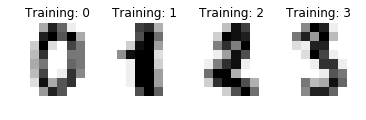

In [11]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

The classifier doesn't understand matrices so we need to reshape each image into a single vector of pixel values:

In [30]:
n_samples = len(digits.images)

# Note, the -1 is equivalent to saying "automatically detect this"
data = digits.images.reshape((n_samples, -1))

So now we see that the image is actually a single 1x64 vector:

In [31]:
data[0].shape

(64,)

Now we need to split our data into training set vs testing set. Let's take the first half as training and the second half as test:

In [35]:
# Note integer division here
n_training = n_samples // 2

training_images = data[:n_training]
test_images = data[n_training:]

training_labels = digits.target[:n_training]
test_labels = digits.target[n_training:]

Now we can use a [support vector machine](http://scikit-learn.org/stable/modules/svm.html) via the scikit learn [support vector classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to create our model:

In [36]:
classifier = svm.SVC(gamma=0.001)

And train it:

In [37]:
classifier.fit(training_images, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now we can predict the labels for the test image data:

In [40]:
predicted = classifier.predict(test_images)

Now we can display the results:

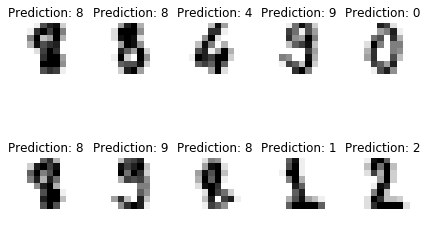

In [52]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
    
plt.tight_layout()
plt.show()

### Nearest Neighbours

The nearest neighbours algorithm is a simple way to group data into a given number of clusters.

We can start by loading the iris dataset. This is a list of measurements of iris flowers (sepal length, sepal width, petal length and petal width), plus the class of each flower (Setosa, Vesicolour and Virginica).

We can load the iris dataset with scikit learn like this:

In [2]:
iris = datasets.load_iris()

We can see the values listed for the type of flower in the `target` property. This will be `0`, `1` or `2`:

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So that we can plot the result we only want to take the first two columns of data. The data in the dataset is found in `data` variable. 

In [4]:
cut_down_data = iris.data[:, :2]
cut_down_data

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

Before we split up the data we need to shuffle it around. We can do this with `numpy`:

In [5]:
shuffled_data = np.random.permutation(cut_down_data)
shuffled_target = np.random.permutation(iris.target)

We can then take a certain proportion of each dataset as training/ testing data:

In [6]:
# Training data - take all but the last 10
train_data = shuffled_data[:-10]
train_target = shuffled_target[:-10]

Now that we have our training data we can train our model:

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Here is where we do the actual training
knn.fit(train_data, train_target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

We can now use our `knn` object to predict the class of the remaining target data:

In [8]:
test_data = shuffled_data[-10:]
test_target = shuffled_target[-10:]

predicted_target = knn.predict(test_data)

print('Predicted: {}'.format(predicted_target))
print('Actual:    {}'.format(test_target))

Predicted: [0 1 0 1 0 0 0 0 0 0]
Actual:    [0 1 0 2 1 0 2 1 0 1]


## Exercise

Have a look at the Scikit learn [linear regression example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html). 

Copy the code into this notebook and see if you can work out what it's doing.

What happens if you reduce the size of the training data?

## More Exercises

We can visualise the iris classification from above using Matplotlib as in this example: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

Have a go at reproducing it and playing with some of the parameters to see how they affect the outcome.

Another simple example is that of isotonic regression vs linear regression as demonstrated here: http://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html